# Exercise: NEISS, Question Set C

#### Summary

The [National Electronic Injury Surveillance System](https://www.cpsc.gov/Safety-Education/Safety-Guides/General-Information/National-Electronic-Injury-Surveillance-System-NEISS) is a data product produced by the US Consumer Product Safety Commission. It tracks emergency room injuries related to consumer products (e.g., "a door fell on me!").

#### Files

- **neiss2017.tsv**: injury data (one injury per row)
- **2018-NEISS-CPSC-only-CodingManual.pdf**: column definitions and explanations
- **2017 NEISS Data Highlights.pdf**: a partial summary of the data
- **2018ComparabilityTable.pdf**: product code definitions
- **categories-cleaned.txt**: product code definitions in CSV format (great for joining!)

#### Source

https://www.cpsc.gov/Safety-Education/Safety-Guides/General-Information/National-Electronic-Injury-Surveillance-System-NEISS

#### Skills

- Reading in files
    - Reading tab-separated files
    - Reading in N/A values
    - Only reading in some of the data
- Replacing values
- Using strings
    - Searching for strings
    - Comparing to a list of strings
    - Regular expressions
- Using numpy/`np.nan`
- Averages practice
- Converting `.value_counts()` and similar results into DataFrames

### Before we start, import what you need to

In [1]:
import pandas as pd
%matplotlib inline

# Read in `neiss2017.tsv`

Something's... weird about this one.

In [11]:
df = pd.read_csv('06-classwork/neiss2017.tsv', sep='\t', encoding='latin_1' )

/Users/km/.pyenv/versions/3.6.5/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2705: DtypeWarning: Columns (0,2) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


### Check that your dataframe has 386907 rows and 19 columns.

In [12]:
df.shape

(386907, 19)

### List the columns and their data types

In [14]:
df.dtypes

CPSC_Case_Number     object
Treatment_Date       object
Age                  object
Sex                   int64
Race                float64
Other_Race           object
Body_Part           float64
Diagnosis           float64
Other_Diagnosis      object
Disposition         float64
Location            float64
Fire_Involvement    float64
Product_1           float64
Product_2           float64
Narrative_1          object
Narrative_2          object
Stratum              object
PSU                 float64
Weight              float64
dtype: object

### I've selected a few columns. What do they mean?

The columns you are interested in are...

- `CPSC_Case_Number`
- `Sex`
- `Age`
- `Narrative_1`
- `Narrative_2`

You'll need to use the **coding manual**, `2018-NEISS-CPSC-only-CodingManual.pdf`. Column definitions are all in the first 30 pages or so. I recommend using the table of contents.

# Cleaning up a column

Take a look at the **sex** column. How many rows of each sex are there?

In [16]:
df['Sex'].value_counts()

1    208695
2    178203
0         8
8         1
Name: Sex, dtype: int64

## Replace the numbers with the appropriate words they stand for.

Those numbers are terrible - codes are fine for storage but not really for reading. We want to **replace the numbers with the words they stand for.**

In [17]:
df['Sex'].replace(1, 'Male', inplace=True)
df['Sex'].replace(2, 'Female', inplace=True)
df['Sex'].replace(0, 'Not recorded', inplace=True)

Male            208695
Female          178203
Not recorded         8
8                    1
Name: Sex, dtype: int64

In [ ]:
# This can also be done using a dictionary
# df['Sex'].replace({1: 'Male, 2: 'Female', 0: 'Not recorded'}, inplace=True)

## Confirm you have 208695 male, 178203 female, and 8 "Not Recorded."

Uh, wait, there is also one patient with `8` as their sex.

In [19]:
df['Sex'].value_counts()

Male            208695
Female          178203
Not recorded         8
8                    1
Name: Sex, dtype: int64

### Look at only the column where `8` is the sex

In [24]:
df[df['Sex'] == 8]

,CPSC_Case_Number,Treatment_Date,Age,Sex,Race,Other_Race,Body_Part,Diagnosis,Other_Diagnosis,Disposition,Location,Fire_Involvement,Product_1,Product_2,Narrative_1,Narrative_2,Stratum,PSU,Weight
160878,;CONCUSSION,NaN,C,8,4.757,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Let's drop that bad row

It looks like bad data! Maybe we can drop it based on `Treatment_Date` being null? 

### How many times is `Treatment Date` been empty?

In [25]:
df[df['Treatment_Date'].isnull()]

,CPSC_Case_Number,Treatment_Date,Age,Sex,Race,Other_Race,Body_Part,Diagnosis,Other_Diagnosis,Disposition,Location,Fire_Involvement,Product_1,Product_2,Narrative_1,Narrative_2,Stratum,PSU,Weight
160878,;CONCUSSION,NaN,C,8,4.757,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Drop the row where `Treatment_Date` is empty

In [26]:
df.dropna(subset=['Treatment_Date'], inplace=True)

### Confirm you have no more missing treatment dates

In [28]:
df[df.Treatment_Date.isnull()]

,CPSC_Case_Number,Treatment_Date,Age,Sex,Race,Other_Race,Body_Part,Diagnosis,Other_Diagnosis,Disposition,Location,Fire_Involvement,Product_1,Product_2,Narrative_1,Narrative_2,Stratum,PSU,Weight


## Graph the number of men and women, but don’t included the “Not Recorded” records

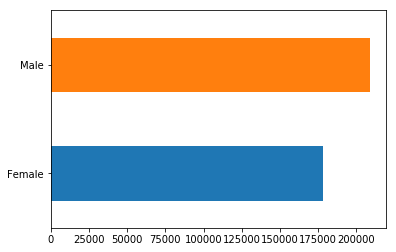

In [32]:
df[df['Sex'] != 'Not recorded']['Sex'].value_counts().sort_values().plot(
  kind='barh')

## "Not recorded" seems silly - change it to be `NaN` instead

If we've talked about it yet, don't use `na_values` for this.

In [33]:
import numpy as np
df['Sex'].replace('Not recorded', np.nan, inplace=True)

## Graph the count of men and women, but don’t included the “Not Recorded” records

Yes, again! The code you use should be different this time.

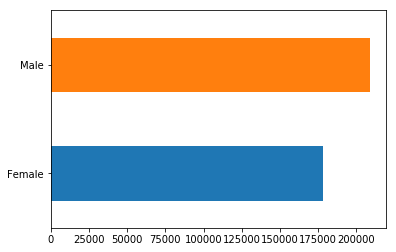

In [34]:
df['Sex'].value_counts().sort_values().plot(kind='barh')

# Finding injuries

## Find every instance where the narrative includes punching a wall

Include phrases like "punched a wall" or "punch wall" or "punched ten thousand walls." Do not type them each individually. How do you do that?????

In [42]:
df[df['Narrative_1'].str.contains('punch.*wall', case=False, na=False)]

,CPSC_Case_Number,Treatment_Date,Age,Sex,Race,Other_Race,Body_Part,Diagnosis,Other_Diagnosis,Disposition,Location,Fire_Involvement,Product_1,Product_2,Narrative_1,Narrative_2,Stratum,PSU,Weight
170,170106272,01/02/2017,26,Female,2.0,NaN,34.0,57.0,NaN,1.0,1.0,0.0,1884.0,0.0,"26YOF WITH FRACTURED WRIST, PUNCHED A WALL",NaN,V,61.0,16.1828
678,170109865,01/01/2017,26,Male,1.0,NaN,82.0,71.0,HAND PAIN,1.0,0.0,0.0,1884.0,0.0,LT HAND PAIN. 26YOM PAIN IN HAND FROM PUNCHIN...,NaN,V,95.0,16.1828
715,170110026,01/02/2017,24,Male,0.0,NaN,82.0,57.0,NaN,1.0,0.0,0.0,1884.0,0.0,24 YOM C/O L HAND PAIN AND SWELLING AFTER PUNC...,/,M,76.0,87.0904
842,170111675,01/04/2017,23,Female,0.0,NaN,82.0,71.0,PAIN,6.0,0.0,0.0,1884.0,0.0,23YF C/O HAND PAIN P PUNCHING A WALL C CLOSED ...,>>PAIN,V,21.0,16.1828
1050,170113068,01/02/2017,23,Female,0.0,NaN,82.0,59.0,NaN,1.0,0.0,0.0,1884.0,0.0,23YOF PUNCHED A WALL W/ RIGHT HAND DX: OPEN WO...,NaN,V,35.0,16.1828
1251,170114115,01/06/2017,30,Female,1.0,NaN,82.0,53.0,NaN,1.0,0.0,0.0,1884.0,0.0,30YOF HAS LEFT HAND PAIN AFTER PUNCHING A WALL...,NaN,S,46.0,77.6641
1293,170114614,01/02/2017,31,Female,2.0,NaN,82.0,71.0,PAIN,6.0,0.0,0.0,1884.0,0.0,31 YO F C/O RT HAND PAIN S/P PUNCHED THE WALL ...,NaN,L,51.0,67.2099
1294,170114617,01/02/2017,8,Male,2.0,NaN,92.0,57.0,NaN,1.0,0.0,0.0,1884.0,0.0,8 YO M C/O SWELLING OF RT 2ND FINGER MOM STATE...,YESTERDAY DX FINGER FX,L,51.0,67.2099
1681,170116284,01/03/2017,21,Female,2.0,NaN,82.0,53.0,NaN,1.0,0.0,0.0,1884.0,0.0,21 YOF C/O HAND PAIN AFTER PUNCHING WALL. DX H...,ON,L,69.0,67.2099
1878,170116707,01/03/2017,50,Male,1.0,NaN,82.0,57.0,NaN,1.0,1.0,0.0,1884.0,0.0,FRAC HAND 50YOM PUNCHED AT WALL AT HOME,DX: FRAC HAND,M,52.0,87.0904


## Graph the gender distribution of wall-punching.

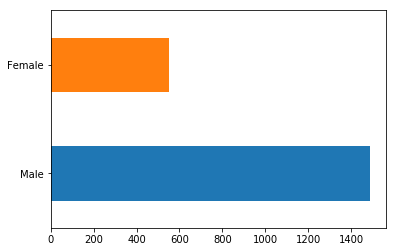

In [57]:
wall_punchers = df[df['Narrative_1'].str.contains('punch.*wall', case=False, 
                                            na=False)]
wall_punchers['Sex'].value_counts().plot(kind='barh')

## Find the average age of a wall-puncher.

Graph the distribution of the ages, too.

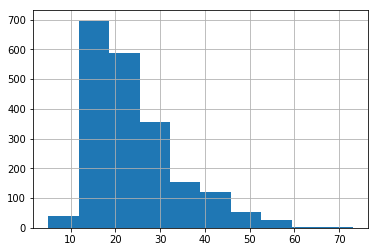

In [56]:
# convert types
df['Age'] = df['Age'].astype(int)
wall_punchers['Age'].mean()
wall_punchers['Age'].hist()

## Finding products

### What are the most popular products for wall punchers?

## Fix the product codes

### What does the product code `1884` stand for? How about `652`?

## Uh, wait, look at those product codes.

`652` shouldn't be possible, it should be `0652`.

### Why did pandas change it from `0652` to `652`?

### Can we fix it so when reading in the data it doesn't change that column?

### Or, well, can we fill in those empty zeroes?

## Get meaningful names for "product code"

Go clean `categories-exported.txt` and save it as `categories-cleaned.csv`. I made another notebook for you!

When you're done, we'll use this to turn the codes into actual words.

### Read in `categories-cleaned.csv` and make sure it looks okay

**It probably doesn't.** Go back to the other notebook and work on it until it looks right.

## Merge together the two datasets

This will use `merge`, but it's really just like an SQL join. Is that exciting? I don't know.

### Confirm that it worked by searching for every injury involving a `Christmas tree`

## Graph the top 30 most popular products for injuries 

## Graph the top 30 most popular products for injuries for men

## Graph the top 30 most popular products for injuries for women